In [2]:
import kagglehub
import os
import pyreadstat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
path = kagglehub.dataset_download("kmamranhossain/urinary-incontinence")

In [4]:
sav_file = os.path.join(path, "Iren_1.sav")
df, meta = pyreadstat.read_sav(sav_file)

In [5]:
meta.column_names

['Age',
 'Height',
 'Weight',
 'Living_area',
 'Occupation',
 'Marittal_status',
 'Family_size',
 'Children',
 'Educational_status',
 'Religion',
 'Jorda',
 'Past_medical_history',
 'Duration',
 'Surgery',
 'Pelvic_strength_pre_test',
 'Abdominal_muscle_strength_pre_test',
 'Pelvic_floor_endurance_pre_test',
 'Abdominal_muscle_endurance_pre_test',
 'How_often_leak_urine_pre_test',
 'Urine_usually_leak_pre_test',
 'Interfere_daily_life_pre_test',
 'ICIQ_SF_Total_pre_test',
 'When_urine_leak_pre_test',
 'Pelvic_strength_week_1',
 'Abdominal_muscle_strength_week_1',
 'Pelvic_floor_endurance_week_1',
 'Abdominal_muscle_endurance_week_1',
 'How_often_leak_urine_week_1',
 'Urine_usually_leak_week_1',
 'Interefere_daily_life_week_1',
 'ICIQ_SF_total_week_1',
 'when_urine_leak_week_1',
 'Pelvic_strength_week_2',
 'Abdominal_muscle_strength_week_2',
 'Pelvic_floor_endurance_week_2',
 'Abdominal_muscle_endurance_week_2',
 'How_often_leak_urine_week_2',
 'Urine_usually_leak_week_2',
 'Interfere_d

In [6]:
# Pretty print the value labels
pprint(meta.value_labels)

{'labels0': {1.0: 'Rural', 2.0: 'Semi_urban', 3.0: 'Urban'},
 'labels1': {1.0: 'Housewife',
             2.0: 'Teacher',
             3.0: 'Service_holder',
             4.0: 'Garments_worker'},
 'labels10': {0.0: 'None',
              1.0: 'A_small_amount',
              2.0: 'A minimum ampunt',
              3.0: 'A_moderate_amount',
              4.0: 'Large_amount'},
 'labels11': {1.0: 'Never urine does not leak',
              2.0: 'Leaks before you can go to the toilet',
              3.0: 'Leaks when you cough or sneeze',
              4.0: 'Leaks when you are asleep',
              5.0: 'Leaks when you are physically active\\exercise',
              6.0: 'Leaks when you finished urinating and dressed',
              7.0: 'Leaks for no obvious reason',
              8.0: 'Leaks all the time'},
 'labels12': {0.0: 'Never',
              1.0: 'About_once_a_week_or_less_often',
              2.0: 'Two_to_three_times_a_week',
              3.0: 'About_once_a_day',
              4.0: 

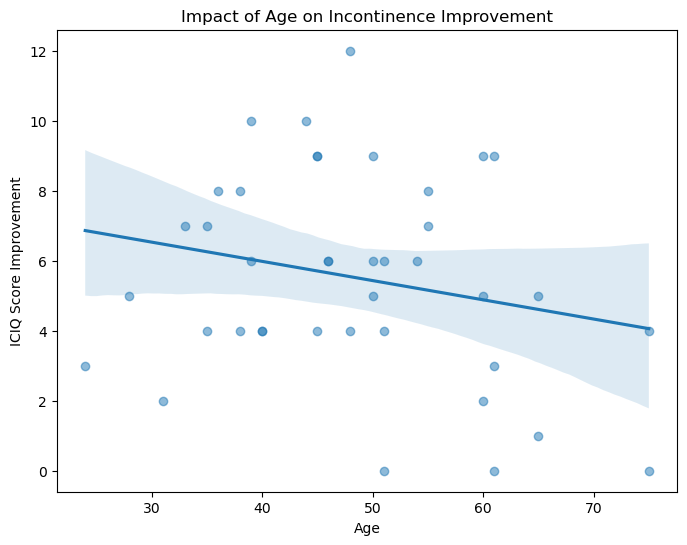

In [7]:
df["ICIQ_change"] = df["ICIQ_SF_Total_pre_test"] - df["ICIQ_SF_total_week_4"]

plt.figure(figsize=(8,6))
sns.regplot(x=df["Age"], y=df["ICIQ_change"], scatter_kws={'alpha':0.5})
plt.xlabel("Age")
plt.ylabel("ICIQ Score Improvement")
plt.title("Impact of Age on Incontinence Improvement")
plt.show()

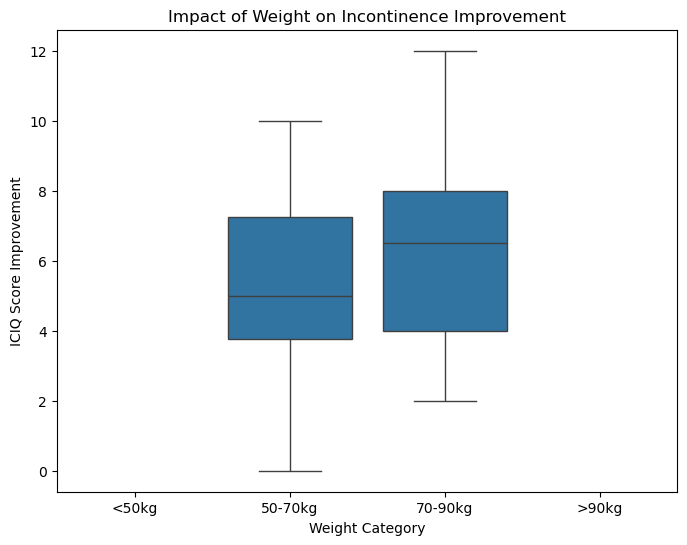

In [8]:
df["Weight_bin"] = pd.cut(df["Weight"], bins=[0,50,70,90,150], labels=["<50kg","50-70kg","70-90kg",">90kg"])

plt.figure(figsize=(8,6))
sns.boxplot(x="Weight_bin", y="ICIQ_change", data=df)
plt.xlabel("Weight Category")
plt.ylabel("ICIQ Score Improvement")
plt.title("Impact of Weight on Incontinence Improvement")
plt.show()

**See`weight_vs_iciq_score_whisker_plot.txt` for explanation on this Whisker Box Plot Graph**

In [18]:
import numpy as np

# Convert categorical weight ranges into approximate numerical values
def convert_weight(weight_str):
    if not isinstance(weight_str, str):  # Handle NaN values
        return np.nan
    elif "<50kg" in weight_str:
        return 45  # Approximate midpoint
    elif "50-70kg" in weight_str:
        return 60  # Midpoint of 50 and 70
    elif "70-90kg" in weight_str:
        return 80  # Midpoint of 70 and 90
    elif ">90kg" in weight_str:
        return 100  # Approximate midpoint
    else:
        return np.nan  # If an unexpected value appears

# Apply the function to convert weight column
df["Weight_numeric"] = df["Weight"].apply(convert_weight)

# Verify conversion
print(df[["Weight", "Weight_numeric"]].head())  # Check transformation

   Weight  Weight_numeric
0    70.0             NaN
1    56.0             NaN
2    70.0             NaN
3    56.0             NaN
4    62.0             NaN


In [10]:
# Select only numeric columns for correlation calculation
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Print correlation of "Weight_numeric" with other factors
print(correlation_matrix["Weight_numeric"].sort_values(ascending=False))

Age                         NaN
Height                      NaN
Weight                      NaN
Living_area                 NaN
Occupation                  NaN
                             ..
Urine_usually_leak_week_4   NaN
ICIQ_SF_total_week_4        NaN
When_urine_leak_week_4      NaN
ICIQ_change                 NaN
Weight_numeric              NaN
Name: Weight_numeric, Length: 61, dtype: float64


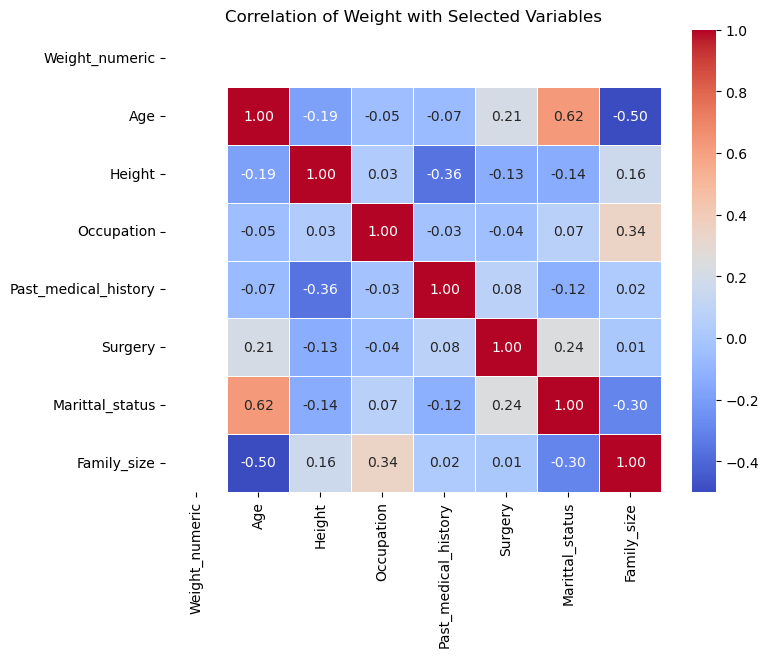

In [11]:
# Select relevant columns for correlation
selected_vars = ["Weight_numeric", "Age", "Height", 
                 "Occupation", "Past_medical_history", "Surgery", "Marittal_status",
                "Family_size"]

# Compute correlation only for these selected variables
correlation_subset = df[selected_vars].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Weight with Selected Variables")
plt.show()

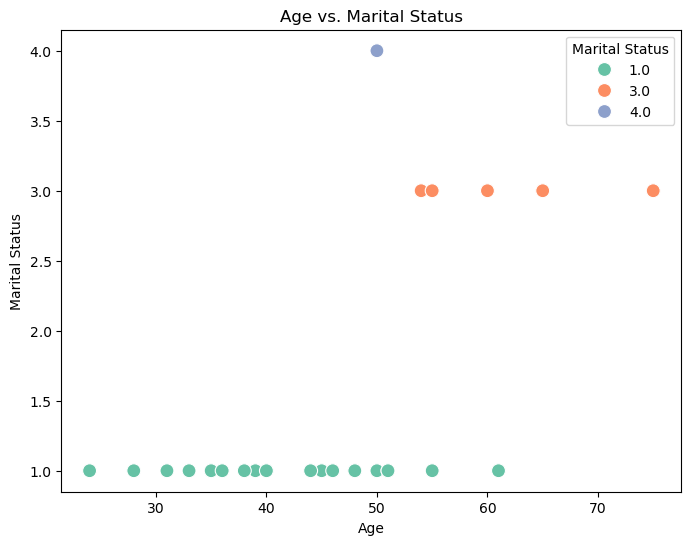

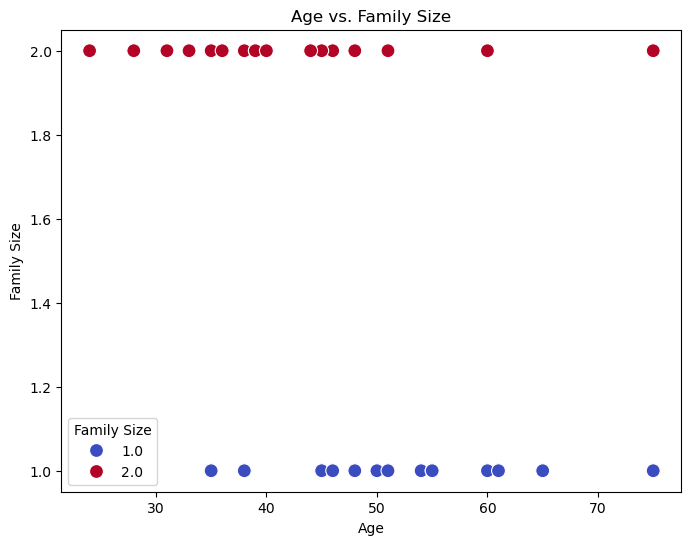

In [15]:
# Scatter plot for Age vs. Marital Status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Marittal_status', hue='Marittal_status', palette='Set2', s=100)
plt.title('Age vs. Marital Status')
plt.xlabel('Age')
plt.ylabel('Marital Status')
plt.legend(title='Marital Status')
plt.show()

# Scatter plot for Age vs. Family Size
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Family_size', hue='Family_size', palette='coolwarm', s=100)
plt.title('Age vs. Family Size')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.legend(title='Family Size')
plt.show()

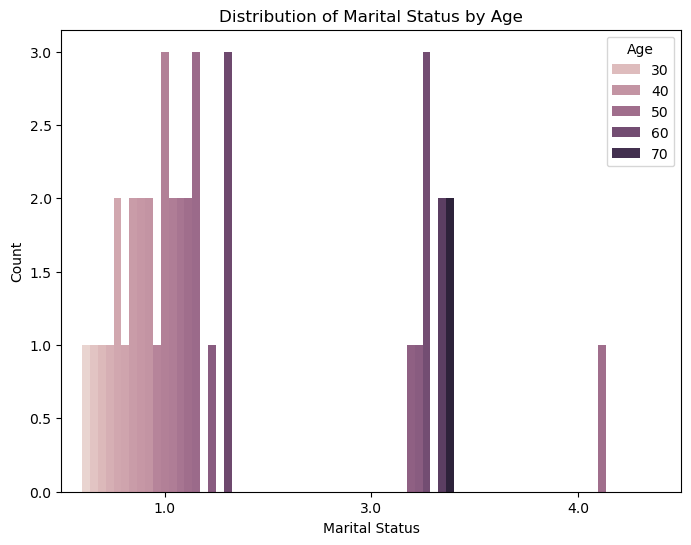

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marittal_status', hue='Age')
plt.title('Distribution of Marital Status by Age')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

C:\Users\jesus\AppData\Local\Temp\ipykernel_33164\2433950454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('Age_group')['Pelvic_strength_progress'].mean().reset_index()
C:\Users\jesus\AppData\Local\Temp\ipykernel_33164\2433950454.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='Age_group', y='Pelvic_strength_progress', palette='coolwarm')


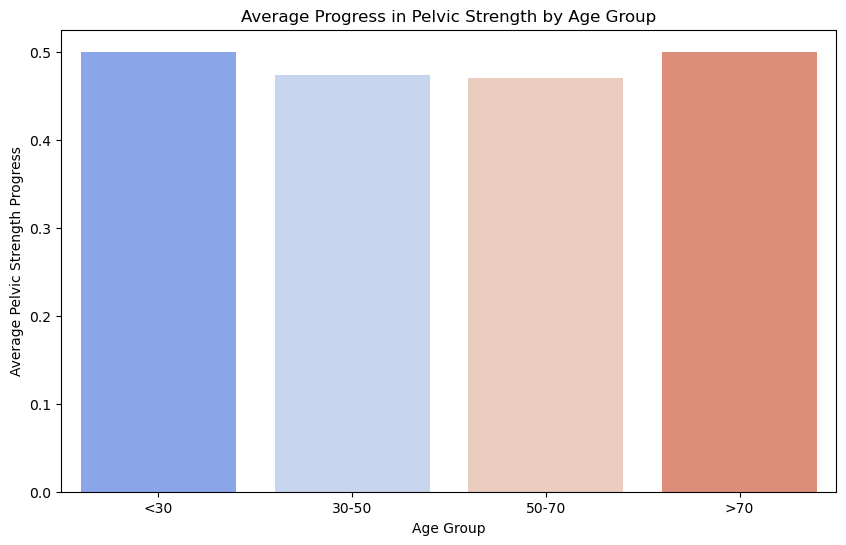

In [22]:
# Create age groups
bins = [0, 30, 50, 70, 100]
labels = ['<30', '30-50', '50-70', '>70']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the progress as the difference between week 4 and week 1
df['Pelvic_strength_progress'] = df['Pelvic_strength_week_4'] - df['Pelvic_strength_week_1']

# Group by Age_group and calculate average progress for Pelvic Strength
df_grouped = df.groupby('Age_group')['Pelvic_strength_progress'].mean().reset_index()

# Plotting the progress for Pelvic Strength
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='Age_group', y='Pelvic_strength_progress', palette='coolwarm')

# Title and labels
plt.title('Average Progress in Pelvic Strength by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Pelvic Strength Progress')

# Show the plot
plt.show()